# Prática 4

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

**Exercício 1** 

Considere a base de dados de casos confirmados por COVID-19 no estado de SP.

Nesta prática, vamos trabalhar com a análise de má-especificação de modelos, ou seja, como fica a análise de diagnóstico se ajustarmos um modelo "correto" e um modelo "errado".

**Exercício 2**
Obtenha o melhor modelo SARIMA para os dados de passageiros aéreos, com previsões para os próximos 12 meses. Repita para outras bases de dados que trabalhamos anteriormente no curso.

**1. Carregue as bibliotecas que serão utilizadas.**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)

**2. Faça a leitura dos dados de COVID-19 do estado de SP e complete os dados faltantes. Verifique se os dados estão Ok.**

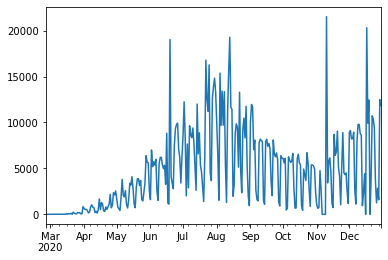

In [3]:
pkgdir = 'dados'

# Leitura dos dados de COVID-19 no estado de SP em 2020 - vamos trabalhar com as mortes
covidSP = pd.read_csv(f'{pkgdir}/covidSP.csv', index_col='date', parse_dates=True)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['confirmed'].plot();

 **3. Repita a análise com gráficos de autocorrelação e autocorrelação parcial feitos em aula. Já é possível identificar características do melhor modelo para esses dados?**

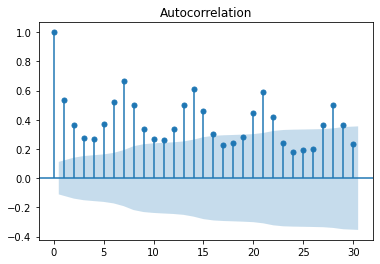

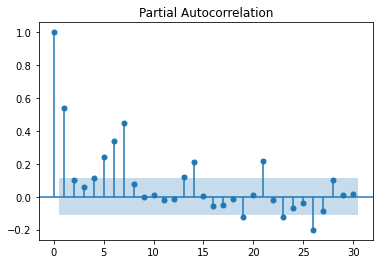

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['confirmed'], lags=30)
plot_pacf(covidSP['confirmed'], lags=30)
plt.show()

Observa-se sazonalidade de período m=7<br>
Autocorrelação para determinar q de MA(q) = 9 (aproximadamente)<br>
Autocorrelação Parcial para determinar p de AR(p) = 1 (aproximadamente)<br>

**4. Utilize o stepwise_fit para escolher as ordens de um modelo SARIMA (p,d,q)x(P,D,Q)m, como feito em aula**

In [5]:
# Ajuste de modelo SARIMA 

auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()

stepwise_fit = auto_arima(covidSP['confirmed'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5922.655, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6007.140, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5916.437, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5845.769, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6005.169, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=5891.230, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5779.141, Time=0.48 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=5816.796, Time=0.22 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=5813.827, Time=0.64 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=5829.733, Time=0.51 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=5787.514, Time=0.62 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=5780.400, Time=0.50 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  309
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2874.364
Date:                           Tue, 10 Aug 2021   AIC                           5756.727
Time:                                   07:59:44   BIC                           5771.648
Sample:                                        0   HQIC                          5762.693
                                           - 309                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9021      0.027    -33.593      0.000      -0.955      -0.849
ar.S.L7        0.9673      0.034     28.508      0.000       0.901       1.034
ma.S.L7       -0.7733      0.067    -11.460      0.000      -0.906      -0.641
sigma2      7.315e+06   2.74e+05     26.680      0.000    6.78e+06    7.85e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):              2203.69
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):              16.15   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**5. Atribua a um objeto modelo1 o modelo escolhido pelo stepwise_fit e previsões1 os valores preditos por ele**

In [6]:
modelo1 = SARIMAX(covidSP['confirmed'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultado1 = modelo1.fit()

previsões1 = resultado1.predict(start=covidSP.index.min(), end=covidSP.index.max(), dynamic=False, typ='levels')
previsões1.index = covidSP.index

**6. Ajuste um modelo "errado" aos dados, por exemplo um SARIMA(0,0,1)x(0,0,2,7), ou seja, com termos de médias móveis e não autorregressivos. Atribua o ajuste e valores preditos aos objetos modelo2 e previsões2.**

In [7]:
modelo2 = SARIMAX(covidSP['confirmed'],order=(0,0,1),seasonal_order=(0,0,2,7))
resultado2 = modelo2.fit()

previsões2 = resultado2.predict(start=covidSP.index.min(), end=covidSP.index.max(), dynamic=False, typ='levels')
previsões2.index = covidSP.index

**7. Faça uma análise de diagnóstico usando os resíduos obtidos pelo modelo1 e modelo2. Compare, por exemplo, os gráficos de autocorrelação e autocorrelação parcial. Observe também o histograma e a densidade alisada dos resíduos.**

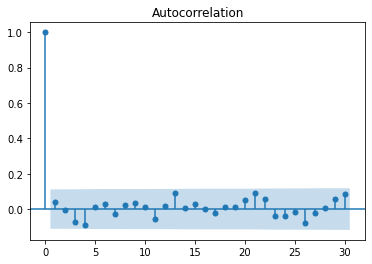

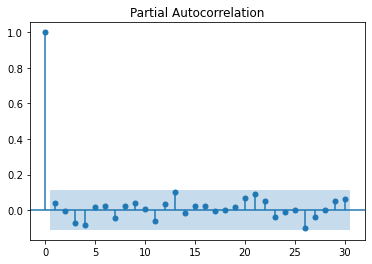

In [8]:
resíduos1 = resultado1.resid
plot_acf(resíduos1, lags=30)
plot_pacf(resíduos1, lags=30)
plt.show()

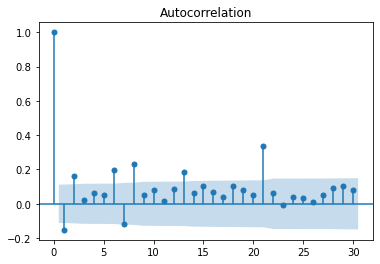

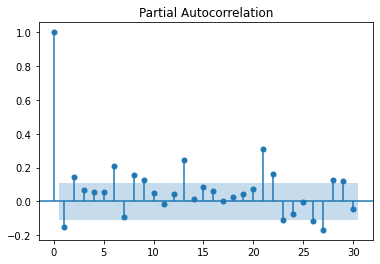

In [9]:
resíduos2 = resultado2.resid
plot_acf(resíduos2, lags=30)
plot_pacf(resíduos2, lags=30)
plt.show()

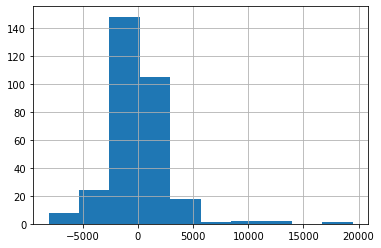

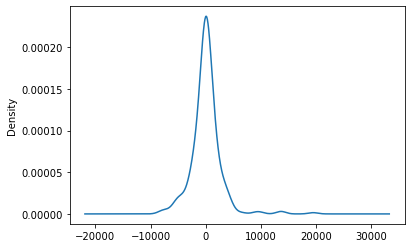

In [10]:
from matplotlib import pyplot

resíduos1.hist()
pyplot.show()

resíduos1.plot(kind='kde')
pyplot.show()

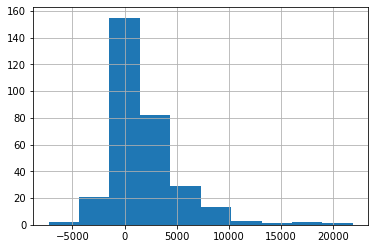

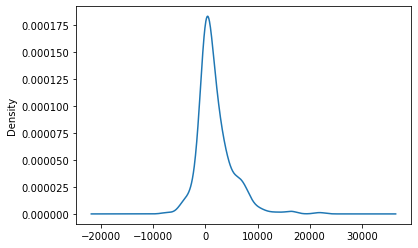

In [11]:
resíduos2.hist()
pyplot.show()

resíduos2.plot(kind='kde')
pyplot.show()

**8. Compare as métricas erro quadrático médio e erro absoluto médio. Existe muita diferença entre eles?**

In [14]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(covidSP['confirmed'], previsões1)
print(f'EQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

error = mean_squared_error(covidSP['confirmed'], previsões2)
print(f'EQM SARIMA(0,0,1)(0,0,2,7): {error:11.10}')

EQM SARIMA(0,1,1)(1,0,1,7): 7290150.437
EQM SARIMA(0,0,1)(0,0,2,7): 14514336.02


In [15]:
from statsmodels.tools.eval_measures import rmse

error = rmse(covidSP['confirmed'], previsões1)
print(f'REQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

error = rmse(covidSP['confirmed'], previsões2)
print(f'REQM SARIMA(0,0,1)(0,0,2,7): {error:11.10}')

REQM SARIMA(0,1,1)(1,0,1,7): 2700.027859
REQM SARIMA(0,0,1)(0,0,2,7):   3809.7685


Os erros do primeiro modelo são muito menores.

**9. Utilize outros métodos de diagnóstico se achar necessário.**

**Exercício 2**
**Considere a série de passageiros aéreos. Obtenha o melhor modelo SARIMA e as previsões para os próximos 12 meses. Você pode repetir para outras bases de dados que vimos anteriormente.** 

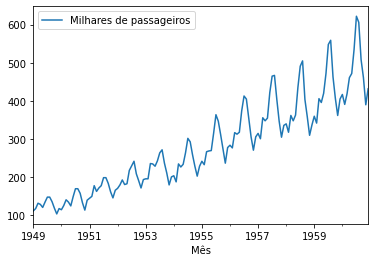

In [17]:
# Fazendo a leitura dos dados, preenchendo os faltantes e verificando se os dados foram carregados corretamente
pkgdir = 'dados'

passengers = pd.read_csv(f'{pkgdir}/airline_passengers.csv', index_col=0, parse_dates=True)
passengers.index.freq = 'MS'

passengers.plot();

In [20]:
# Ajuste de modelo SARIMA

stepwise_fit = auto_arima(passengers['Milhares de passageiros'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.22 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.09 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.11 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 10 Aug 2021   AIC                           1019.178
Time:                                     08:30:41   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Prevendo o próximo período
modelo = SARIMAX(passengers['Milhares de passageiros'], order=(0,1,1), seasonal_order=(2,1,0,12))
resultados = modelo.fit()
fcast = resultados.predict(len(passengers),len(passengers)+12,typ='levels').rename('Previsões ARIMA(0,1,1)x(2,1,0)12')

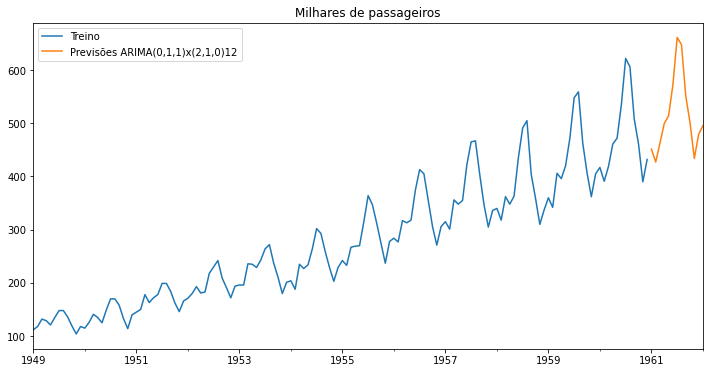

In [22]:
title = 'Milhares de passageiros'
ylabel=''
xlabel=''

ax = passengers['Milhares de passageiros'].plot(legend=True,figsize=(12,6),title=title, label='Treino')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);